<a href="https://colab.research.google.com/github/EfaOnyianta/Stroke-Analysis-and-risk-factors-/blob/main/Efa_o_Project_2_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
#import Libraries and model Metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline as make_sampler_pipeline
from sklearn.model_selection import train_test_split, cross_val_score

#Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

#Classification Metrics
from sklearn.metrics import (roc_auc_score, ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay, RocCurveDisplay, 
                             f1_score, accuracy_score, classification_report)
#Scikit-Learn config and display
from sklearn import metrics
from sklearn import set_config
set_config(display='diagram')
#for filter warnings 
import warnings
warnings.filterwarnings('ignore')

Data used was sourced from
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download Stroke Prediction Dataset 11 clinical features for predicting stroke events FEDESORIANO

The data we will be analyzing is Stroke predictions. These predictions will be calculated using sex, age, smoking habits, bmi and other features to predict if a person has had a stroke, and and if there is any correlation to these features and a persons risk factors to the development of the disease. Hopefully with this data analyzation we will be better able to predict if a patient has had a stroke, make sure the model is a good fit for this type of data, keep the false negative sna dfalse positve s to a very low percentage and hopefully with this data prevent the development of stroke in others.

I chose a medicine related data set because i would like to go into medical tech with my data analysis, and I find medicine interesting since i have been in the field for the past 8 years, and on these topics im very knowlegable.

##Loading and inspecting the Data

In [2]:
# Loading Data and displaying first 5 rows 
path = '/content/healthcare-dataset-stroke-data[1].csv'
df = pd.read_csv('/content/healthcare-dataset-stroke-data[1].csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


We need to make a copy of the original to avoid manipulations

In [3]:
#save copy 
stroke_df = df.copy()

In [4]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
stroke_df['age'] = stroke_df['age'].astype(int)

In [6]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int64  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 479.2+ KB


#Checking for duplicates, missing values, dropping dupes and replacing missing values

In [7]:
#get sum of missing values in dataframs
stroke_df.isna().sum().sum()

201

In [8]:
#going to drop the ID columns since its kinda useless at this point in the analysis of this data
stroke_df = stroke_df.drop(columns =['id'])

In [9]:
#display sum of missing values per column
stroke_df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

All the missing data is in BMI. Knowing what i know there is a correleation between BMI and stroke risk, im goign to fill the numeric data with the mean since bmi is a float data type

In [10]:
mean_bmi = df['bmi'].mean()
stroke_df['bmi'].fillna(mean_bmi, inplace=True)
stroke_df.isna().sum()
#great that handled the missing values in BMI

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
stroke_df.duplicated().sum()
#no duplicates so no need to drop them

0

In [12]:
#now im goign to display stats for catgorical columns
stroke_df.describe(include = 'object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [13]:
stroke_df.describe(include = 'number')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


in looking at the categorical columns nothign is really relevant besides gender and smoking status. I'll probably drop 'ever married', 'work type' and 'residence type'. 

In [14]:
#now im going to check the values in the columns i chose to keep 'gender' and 'smoking status'
stroke_df.value_counts('gender')
#nothing is weird here data checks out with dictionary

gender
Female    2994
Male      2115
Other        1
dtype: int64

In [15]:
stroke_df.value_counts('smoking_status')
#no weird values either 

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
dtype: int64

There are no missing values or any more data inconsistencies. Ill make models of the target (stroke) and the features, age, gender, hypertension, heart disease, avg glusoce, bmi and smoking status. 

##Exploratory Visualizations

[Text(0.5, 1.0, '# of stroke victims vs non effected')]

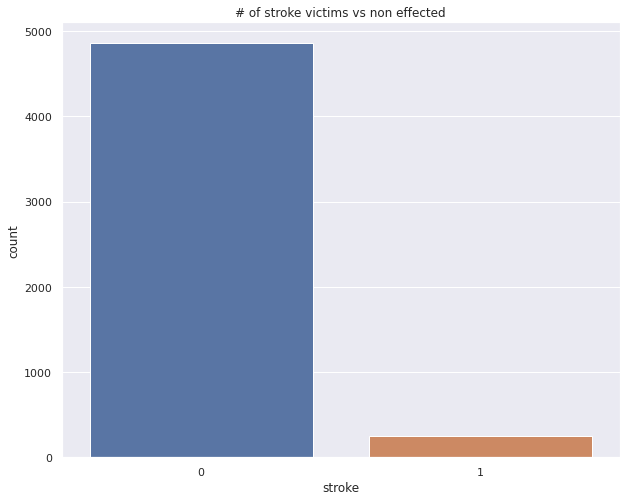

In [16]:
#sns.set(font_size = 2)
#plt.figure(figsize = (10,8))
sns.set(rc={'figure.figsize': (10,8)})
sns.countplot(stroke_df['stroke']).set(title ='# of stroke victims vs non effected')
#stroke: 1 if the patient had a stroke or 0 if not

[Text(0.5, 1.0, ' Patient age range')]

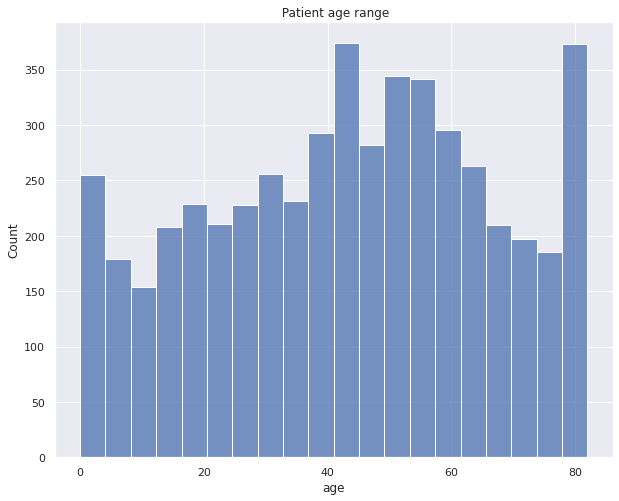

In [17]:
sns.histplot(data=stroke_df, x='age').set(title=' Patient age range')
#a range of patient age that were recorded there is a vast range from infants to the elderly 

[Text(0.5, 1.0, 'Patients based on gender ')]

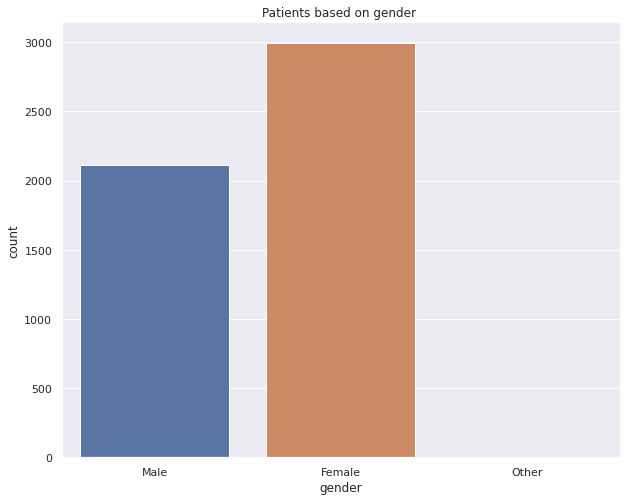

In [18]:
sns.countplot(stroke_df['gender']).set(title= 'Patients based on gender ')
#it is medically true that women go to the doctor more, with the data havign s higher percentage of females.  

[Text(0.5, 1.0, 'Patient BMI range')]

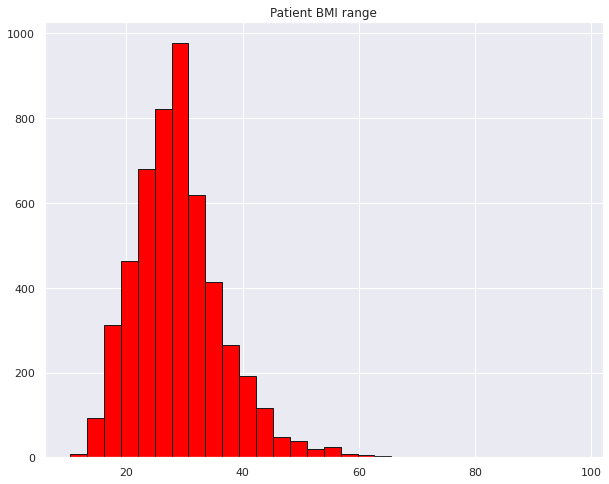

In [19]:
stroke_df['bmi'].hist(color='red',bins=30,
                           edgecolor='k').set(title='Patient BMI range')
#This is documenting patient BMI range the majority of the patients are in a more average range howeevr there are outlier in very unhealth bmi thresholds (morbid obesity)

[Text(0.5, 1.0, 'Patient avergage glucose level')]

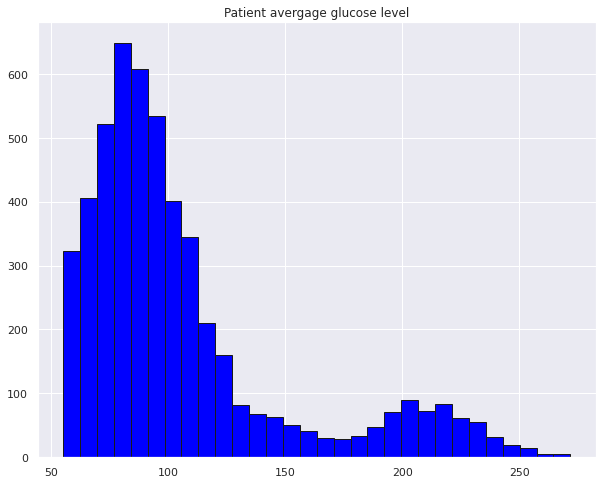

In [20]:
stroke_df['avg_glucose_level'].hist(color  ='blue',bins= 30,
                             edgecolor='k').set(title= 'Patient avergage glucose level'
 #this is showing average glucose level and like bmi most patients are in a normal range but the outlier are ina very unhealthy glucose range. (150+)                            

[Text(0.5, 1.0, 'Smoking status and patient age')]

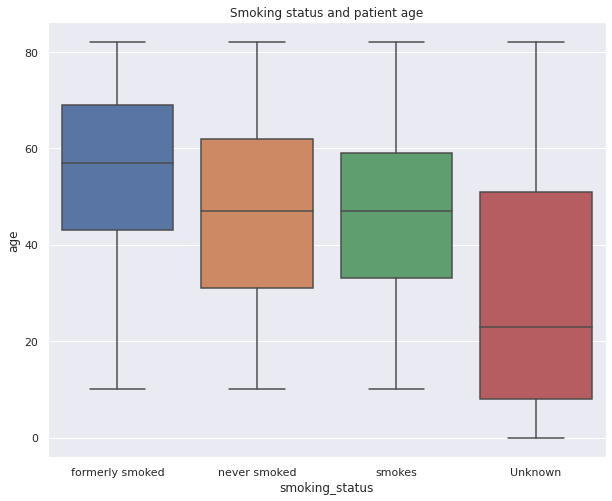

In [21]:
from itertools import count
sns.boxplot(data=stroke_df,y= 'age',x ='smoking_status').set(title = 'Smoking status and patient age') 
#this is showing the age of the patients that smoke with most of them being of middle age.

[Text(0.5, 1.0, 'Patients with heart disease')]

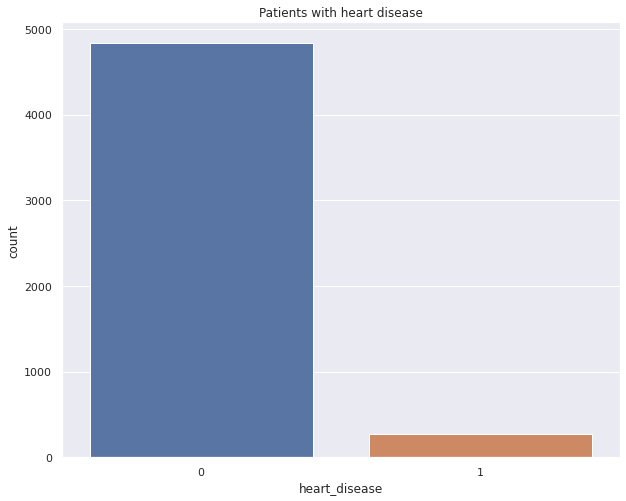

In [22]:
sns.countplot(stroke_df['heart_disease'],hue=['stroke']).set(title = 'Patients with heart disease')
#The stroke and heart disease graphs are almost identical. There is a known correletion betwene heart disease and stroke but a nice heat map in the future will show how much the correlation is. 

[Text(0.5, 1.0, 'Patients with hypertension')]

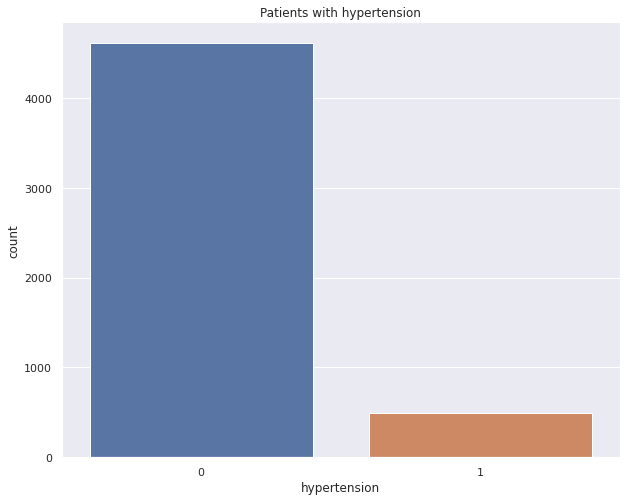

In [23]:
sns.countplot(stroke_df['hypertension']).set(title='Patients with hypertension')
# the hypertension graph also looks very similar too so im curious to  see how mcuh correlation there is between these features and stroke. 

[Text(0.5, 1.0, 'Patient BMI Range')]

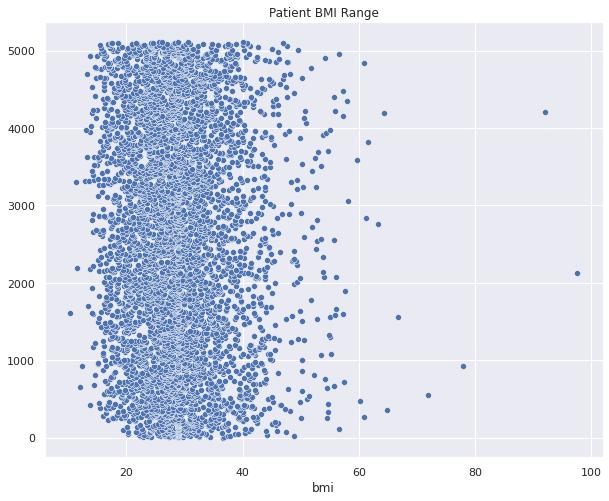

In [24]:
sns.scatterplot(x= stroke_df['bmi'], y = stroke_df.index).set(title = 'Patient BMI Range')
#the outlier in BMI are bmi's in the 90's / close to 100. I cant say confidently if those are odd values because a person can have a bmi of 99 and be deemed severely morbidly obese. 

##Explanatory Visualization


In this section our task is to complete any statistical analyses that might help us understand, explain, or model with our data.

Histogram to view the distributions of various features in your dataset. Boxplot to view statistical summaries of various features in your dataset. Heatmap of the correlation between features. These are just going to be used to analyse the data and see what i features would be worth visualization

[Text(0.5, 1.0, 'Stroke data correlations')]

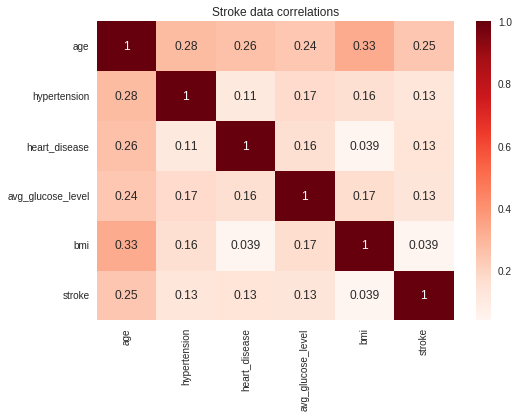

In [100]:
corr = stroke_df.corr()
sns.heatmap(corr,cmap= 'Reds', annot = True).set(title ='Stroke data correlations')

None of the features have a high or very strong correletaion, this is very surprising to me because hypertension, heart disease and bmi all have a strong nexus with the occurance of stroke, not sure why the correlation is so weak. But the features i will explore are age and stroke (.25), bmi and age (.33), heart disease(.26) and hypertension (.28)

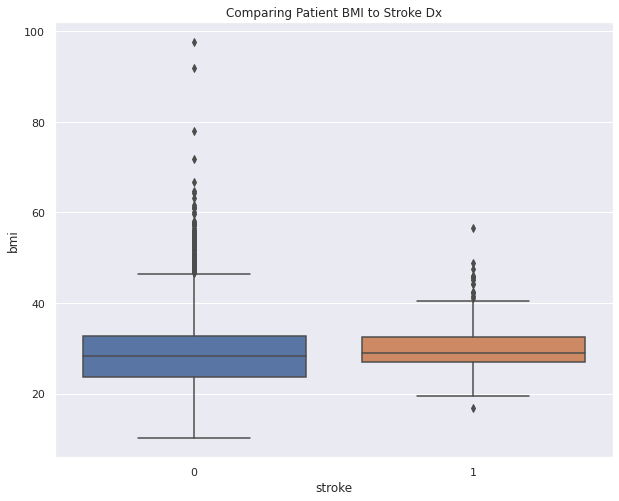

In [26]:
ax = sns.boxplot(x='stroke', y='bmi', data= stroke_df)
ax.set_title("Comparing Patient BMI to Stroke Dx");

This boxplot shows a lot more info, in the stroke sufferers the minimum bmi was a lot higher vs the non affected group. 

##Stakeholder visualizations

[Text(0.5, 1.0, 'Patient Employment and Age vs Stroke Dx')]

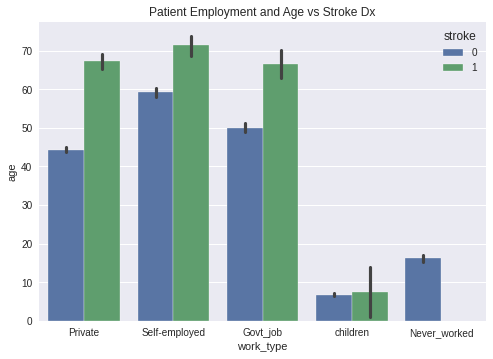

In [112]:
sns.barplot(data= stroke_df, x='work_type',y='age', hue = 'stroke').set(title = 'Patient Employment and Age vs Stroke Dx')

[Text(0.5, 1.0, 'Patient Employment and BMI vs Stroke Dx')]

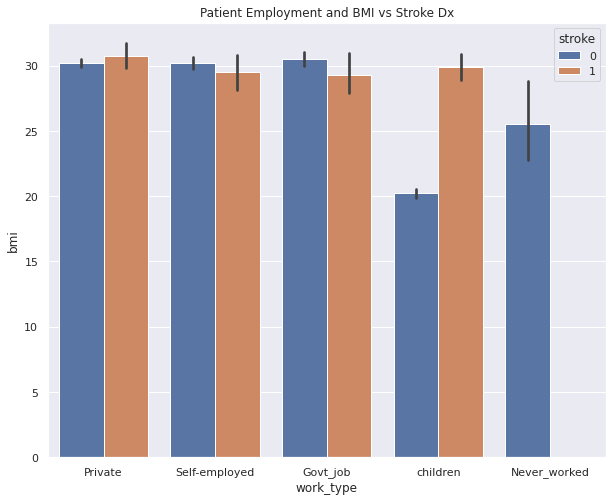

In [28]:
sns.barplot(data= stroke_df, x='work_type',y='bmi', hue = 'stroke').set(title = 'Patient Employment and BMI vs Stroke Dx')

The above grouped barchart shows employment average bmi and their stroke dx. People that have never worked have no strokes recorded and their mean BMI is in a healthy range showing that work might lead to less exercise resulting in a higher bmi and a higher chance of stroke. If this is an insurance comapany it would be smart that if they offer coverage for private gov as well as small businesses it would be ideal to offer incentives for insurance holders and offer lower premiums if they can can offer their employees free or cheaper gym memberships to get them moving. This will lead to havig to pay out less in emergency care for unhealthy employees. (Also did a second version with age and stroke risk does increase with age, with the average stroke sufferer being 65 )

[Text(0.5, 1.0, 'Patient Smoking habits, average glucose level and heart disease')]

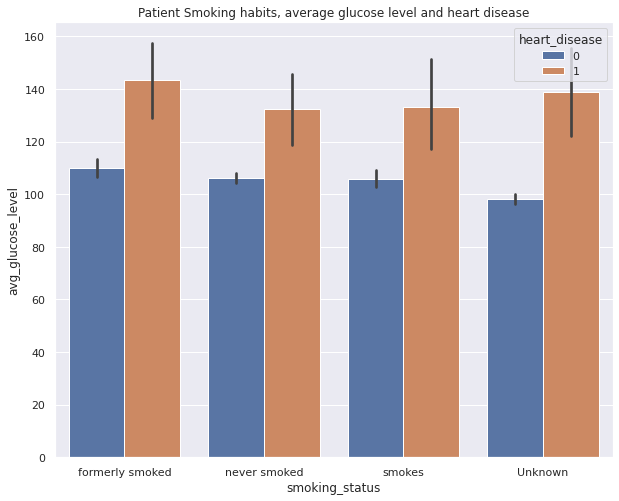

In [29]:
sns.barplot(data= stroke_df, x='smoking_status',y='avg_glucose_level', hue = 'heart_disease').set(title = 'Patient Smoking habits, average glucose level and heart disease')

[Text(0.5, 1.0, 'Patient Smoking habits, average glucose level and Stroke')]

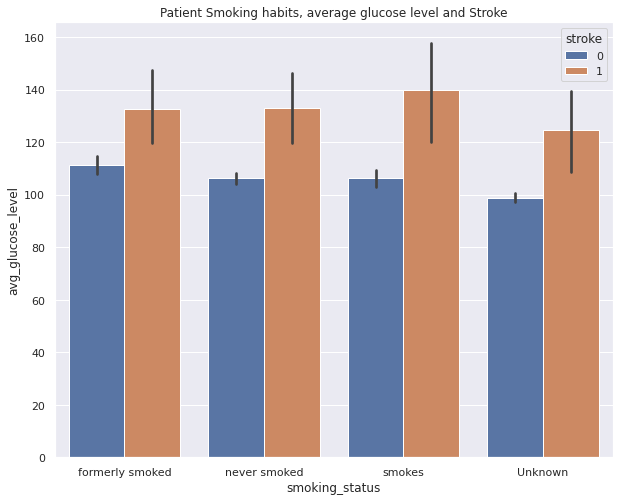

In [30]:
sns.barplot(data= stroke_df, x='smoking_status',y='avg_glucose_level', hue = 'stroke').set(title = 'Patient Smoking habits, average glucose level and Stroke')

The above mentioned chart shows patient smoking havits, their average glucose and if they suffered a from heart disease and a stroke. The overlap of stroke and heart disease is very close so wanted to show both. The prevalence of stroke on average was higher in those that smoked and has high sugar, but not really in just smokers. When their sugar was controlled it seems smoking alone isnt much of a indicator that they would develop heart disease or have a stroke, but to smoke with another health conditon (diabetes, pre diabetes) seems to have upped the risk of both. This could be deemed a little harsh but diabetes already has enough complicaitons to add smoking on top of that is putting a person at risk of a lot of issues including stroke/ heart disease. Also for diabetics that continue to keep thier health in check send them marketing regaridng the risks of smoking and the development of such diseasesto deter currtent customers from starting/ picking up the habit.

##Action plan
With the above mentioned data we will take a few courses of action regarding trying the trends seen and their correletion to the development of a stroke. 

*  BMI seems to play a large role in the occurance of stroke. All the people
who suffered a stroke besides the children were all obese (BMI over 30). There seems to be decent nexus and it would be advisable to push movement and weight management services with our patients to bring down the overall BMI and hopefully minimize the occurance of stroke. 

*   Glucose also played a role as well with everyone who didnt suffer froma  stroke having a normal glucose level (100<) vs everyone who suffered from a  stroke has abnormal glucose. This leads me to believe that a lot of people in this group might have undiagnosed or not well treated diabetes. We need to be more diligent in diabetes screenings of patients and when identified getting the patient on some sort of medication management to bring down the glusoce level. 


*  Hypertension, heart disease seem to go very hand in hand when observed against the occurance of stoke, the number of patients with hypertension, heart disease all seem to also be stroke victims, Once a patient is diagniosed with either of these they should be put on a watch list. They should be getting their labs checked eveyr 3 months for decline as well as medications to help handle the hypertension and heart disease. 

With proper evaluation and watching of patient vitals and current diagnosed ailments, we can hopefully get ahead of the curve and prevent further decline in health of our patients due to CVA (strokes)





##Modeling
Below we will 

* Pre process 
* Fit and evaluate different models to see how they perform 
* Tune them with gridsearchCV 
* Feature engineeer to choose a production model for this data. 

##Preprocessing

In [67]:
stroke_df['stroke'].value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [68]:
#define features and target 

X = stroke_df.drop(columns='stroke').copy()
y = stroke_df['stroke'].copy()

In [75]:
#train test split and create modeling pipelines. 
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, random_state= 42)
cat_selector = make_column_selector(dtype_include = 'object')
num_selector = make_column_selector(dtype_include ='number')
freq_imputer = SimpleImputer(strategy = 'most_frequent')
mean_imputer = SimpleImputer(strategy ='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown ='ignore', sparse = False)

In [77]:
num_pipe = make_pipeline( mean_imputer, scaler)
cat_pipe = make_pipeline(freq_imputer, ohe)
number_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe,cat_selector)
preprocessor = make_column_transformer(number_tuple, cat_tuple, remainder= 'passthrough')
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f878edf8ee0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f878eb6d6d0>)])

#SideBar
Due to this being medical data there is an imbalance in the target (more observed patients didnt suffer a stroke than did) which is great, however it renders observations "biased" since the majority class is favored. **See below**

In [81]:
over_sampler = RandomOverSampler()
over_sample_pipe = make_sampler_pipeline(preprocessor,over_sampler)
X_train_over, y_train_over= over_sample_pipe.fit_resample(X_train, y_train)

In [101]:
print('Original X_train class balance')
print(y_train.value_counts())
print('Oversampled X_train_over class balance')
y_train_over = pd.Series(y_train_over)
print(y_train_over.value_counts())

Original X_train class balance
0    3645
1     187
Name: stroke, dtype: int64
Oversampled X_train_over class balance
0    3645
1    3645
Name: stroke, dtype: int64


In [88]:
smote = SMOTE()
log_reg_smote = LogisticRegression(max_iter= 100)
log_reg_smote_pipe = make_sampler_pipeline(preprocessor,smote,log_reg_smote)
log_reg_smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f878edf8ee0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f878eb6d6d0>)])),
                ('smote', SMOTE()),
                ('logisticregression', LogisticRegression())])

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1216
           1       0.13      0.77      0.22        62

    accuracy                           0.73      1278
   macro avg       0.56      0.75      0.53      1278
weighted avg       0.94      0.73      0.81      1278



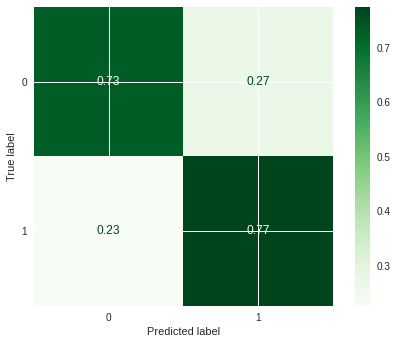

In [89]:
test_preds = log_reg_smote_pipe.predict(X_test)
print(classification_report(y_test, test_preds))
ConfusionMatrixDisplay.from_predictions(y_test, test_preds,normalize='true',cmap='Greens');

even thought this models accuracy is worse, its using more balanced data so the predictions are more realistic. 

##Dummy Modeling

In [102]:
# Make a dummy model and train 
dummy = DummyClassifier()
dummy_pipe = make_pipeline( preprocessor,dummy)
dummy_pipe.fit(X_train, y_train)
#now evaluate how it performs on training data
dummy_train_predictions = dummy_pipe.predict(X_train)
dummy_test_predictions = dummy_pipe.predict(X_test)
print('Predictions:')
dummy_train_predictions
dummy_test_predictions

Predictions:


array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3645
           1       0.00      0.00      0.00       187

    accuracy                           0.95      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.90      0.95      0.93      3832



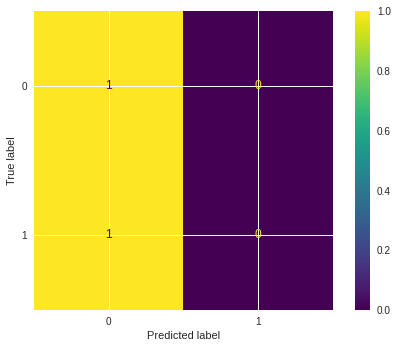

In [103]:
#run a classification report to see how it performs on train
print(classification_report(y_train, dummy_train_predictions))
ConfusionMatrixDisplay.from_predictions(y_train, dummy_train_predictions, normalize = 'true')

On the training data the dummy model got a 96 on accuracy

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



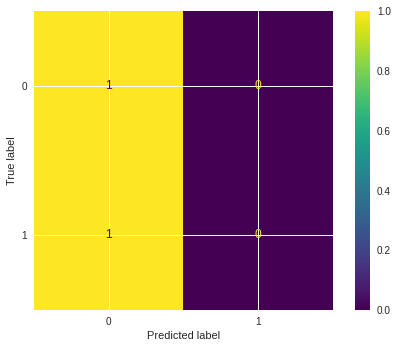

In [38]:
print(classification_report(y_test, dummy_test_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, dummy_test_predictions, normalize = 'true')

On the testing data the model got a 94 accuracy score. Now were going to get the paramenters of the model with PCA attached and make a new model and see if it gets better. 

In [39]:
dummy_pipe2 = make_pipeline (preprocessor, PCA(), DummyClassifier())
dummy_pipe2.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f87991b8370>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   spars

In [40]:
dummy_pipe2_param_grid = {'dummyclassifier__random_state': [range(1,42),None],
                        'dummyclassifier__constant':[range(1,50), None],
                        'dummyclassifier__strategy': ['prior','most_frequent','uniform','stratified','constant'],
                        'pca__n_components': range(1,11)}

In [116]:
dummy_pipe_gscv = GridSearchCV(dummy_pipe2, dummy_pipe2_param_grid)

dummy_pipe_gscv.fit(X_train, y_train)
print('Best Dummy Parameters:')
print(dummy_pipe_gscv.best_params_)
dummybest_pipe = dummy_pipe_gscv.best_estimator_
print(f'Accuracy of best Dummy model is: {dummybest_pipe.score(X_test, y_test)}')

Best Dummy Parameters:
{'dummyclassifier__constant': range(1, 50), 'dummyclassifier__random_state': None, 'dummyclassifier__strategy': 'prior', 'pca__n_components': 1}
Accuracy of best Dummy model is: 0.9514866979655712


##KNN Model 

In [117]:
#create KNN model and pipelines 
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, knn)
knn_pipe.fit(X_train, y_train)
knn_train_predictions = knn_pipe.predict(X_train)
print('Predictions:')
knn_train_predictions
knn_test_predictions

Predictions:


array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3645
           1       0.75      0.05      0.09       187

    accuracy                           0.95      3832
   macro avg       0.85      0.52      0.53      3832
weighted avg       0.94      0.95      0.93      3832



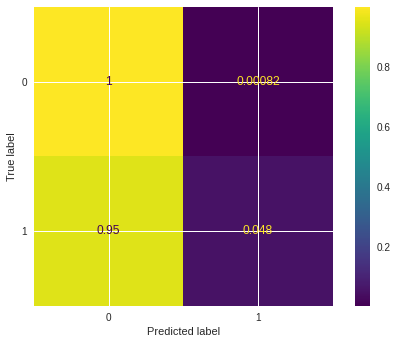

In [42]:
#evaluate metrics on train
print(classification_report(y_train, knn_train_predictions))
ConfusionMatrixDisplay.from_predictions(y_train, knn_train_predictions, normalize = 'true')

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



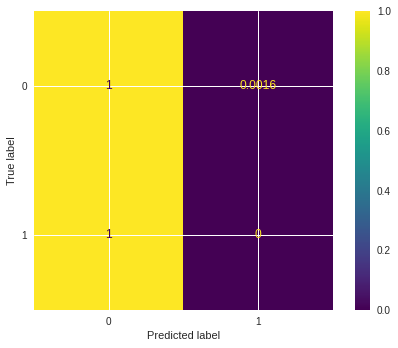

In [44]:
#evaluate metrics on test
print(classification_report(y_test, knn_test_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_predictions, normalize = 'true')

In [45]:
knn_pipe2 = make_pipeline (preprocessor, PCA(), KNeighborsClassifier())
knn_pipe2.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f87991b8370>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   spars

In [46]:
#Make a knn pipe for grid search
knn_pipe2_param_grid = {'kneighborsclassifier__n_neighbors': range(1,20),
                        'kneighborsclassifier__p': range(1,10),
                        'kneighborsclassifier__weights': ['distance','uniform'],
                        'pca__n_components': range(1,11)}

In [111]:
knn_pipe_gscv = GridSearchCV(knn_pipe2, knn_pipe2_param_grid)

knn_pipe_gscv.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gscv.best_params_)
best_pipe = knn_pipe_gscv.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'uniform', 'pca__n_components': 8}
Accuracy of best KNN model is: 0.9507042253521126


Best parameters for KNN are: Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 8, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform', 'pca__n_components': 5}
Accuracy of best KNN model is: 0.9514866979655712

** these are the best params without pca, surprised its not much change tbh**
Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 6, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.9522691705790297

##Logistic Regression

In [90]:
#Like i mentioned above there isa class imbalance and Logistic regression allows easy handlign of this withhclass weight which i added to baseline mode. 
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_pipe = make_pipeline(preprocessor, log_reg)
log_reg_pipe.fit(X_train, y_train)
log_reg_train_predictions = log_reg_pipe.predict(X_train)
log_reg_test_predictions = log_reg_pipe.predict(X_test)
print('Predictions:')
log_reg_train_predictions
log_reg_test_predictions

Predictions:


array([1, 1, 0, ..., 0, 0, 1])

              precision    recall  f1-score   support

           0       0.99      0.74      0.84      3645
           1       0.14      0.82      0.24       187

    accuracy                           0.74      3832
   macro avg       0.56      0.78      0.54      3832
weighted avg       0.95      0.74      0.81      3832



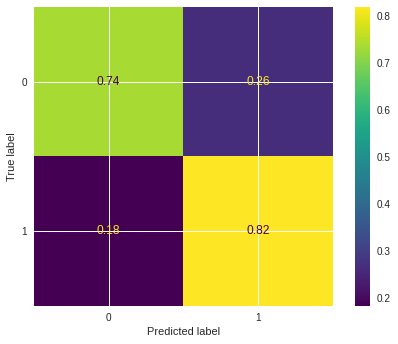

In [91]:
#evaluate train data
print(classification_report(y_train, log_reg_train_predictions))
ConfusionMatrixDisplay.from_predictions(y_train, log_reg_train_predictions, normalize = 'true')

In [ ]:
#evaluate test
print(classification_report(y_test, log_reg_test_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, log_reg_test_predictions, normalize = 'true')

In [51]:
#make a logistic regression pipe
log_reg_pipe2 = make_pipeline (preprocessor, PCA(), LogisticRegression())
log_reg_pipe2.get_params()

{'memory': None,
 'steps': [('columntransformer', ColumnTransformer(remainder='passthrough',
                     transformers=[('pipeline-1',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    <sklearn.compose._column_transformer.make_column_selector object at 0x7f87991b8370>),
                                   ('pipeline-2',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   spars

In [108]:
#make param grid for grid search
log_reg_pipe2_param_grid = {'logisticregression__max_iter': range(1,100),
                        'logisticregression__penalty': ['l1','l2','elasticnet',None],
                        'logisticregression__solver': ['liblinear','saga'],
                        'logisticregression__class_weight': ['balanced'],
                        'pca__n_components': range(1,11)}

In [109]:
#evaluate best parameters with GridsearchCV
log_reg_pipe2_gscv = GridSearchCV(log_reg_pipe2, log_reg_pipe2_param_grid)

log_reg_pipe2_gscv.fit(X_train, y_train)
print('Best Logistic Regression Parameters:')
print(log_reg_pipe2_gscv.best_params_)
log_best_pipe = log_reg_pipe2_gscv.best_estimator_
print(f'Accuracy of best Logistic Regression model is: {log_best_pipe.score(X_test, y_test)}')

Best Logistic Regression Parameters:
{'logisticregression__class_weight': 'balanced', 'logisticregression__max_iter': 1, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'saga', 'pca__n_components': 1}
Accuracy of best Logistic Regression model is: 0.7081377151799687


##Model reevaluation
Were going to reevaluate the models and see if the PCA with 11 ncompoents helps improve the model. im also going to run it with the best paramenters that were tested above when tuned with grid search. 

####Dummy Model Reevaluation with best params

---
'dummyclassifier__constant': range(1, 50), 'dummyclassifier__random_state': None, 'dummyclassifier__strategy': 'prior', 'pca__n_components': 1}


In [53]:
# Make a dummy model and train 
dummy_tuned = DummyClassifier(strategy='prior', random_state =42)
dummy_tuned_pipe = make_pipeline( preprocessor,PCA(n_components=1),dummy_tuned)
#dummy_tuned_pipe
dummy_tuned_pipe.fit(X_train, y_train)
#now evaluate how it performs on training data
dummy_tuned_train_predictions = dummy_tuned_pipe.predict(X_train)
dummy_tuned_test_predictions = dummy_pipe.predict(X_test)
print('Predictions:')
dummy_tuned_train_predictions
dummy_tuned_test_predictions

Predictions:


array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3645
           1       0.00      0.00      0.00       187

    accuracy                           0.95      3832
   macro avg       0.48      0.50      0.49      3832
weighted avg       0.90      0.95      0.93      3832



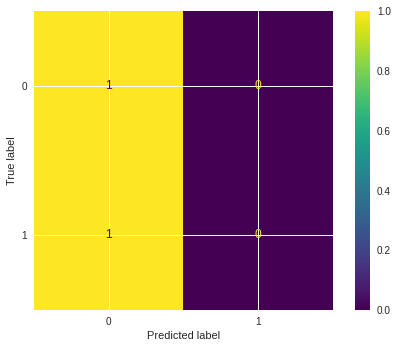

In [54]:
#run a classification report to see how it performs on train
print(classification_report(y_train, dummy_tuned_train_predictions))
ConfusionMatrixDisplay.from_predictions(y_train, dummy_tuned_train_predictions, normalize = 'true')

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



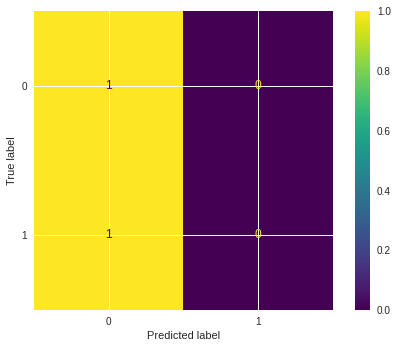

In [55]:
#run a classification report to see how it performs on train
print(classification_report(y_test, dummy_tuned_test_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, dummy_tuned_test_predictions, normalize = 'true')

##KNN model reevaluation with best params
Best KNN Parameters:
* {'kneighborsclassifier__n_neighbors': 6, 

* 'kneighborsclassifier__p': 2                                                     'kneighborsclassifier__weights': 'uniform', 
* 'pca__n_components': 8}


Accuracy of best KNN model is: 0.9507042253521126

In [98]:
#add best params to model
knn_tuned = KNeighborsClassifier()
knn_tuned_pipe = make_pipeline(preprocessor,PCA(n_components = 11), knn_tuned)
knn_tuned_pipe.fit(X_train, y_train)
knn_tuned_train_predictions = knn_tuned_pipe.predict(X_train)
knn_tuned_test_predictions = knn_tuned_pipe.predict(X_test)
print('Predictions:')
knn_tuned_train_predictions
knn_tuned_test_predictions

Predictions:


array([0, 0, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3645
           1       0.57      0.04      0.08       187

    accuracy                           0.95      3832
   macro avg       0.76      0.52      0.53      3832
weighted avg       0.93      0.95      0.93      3832



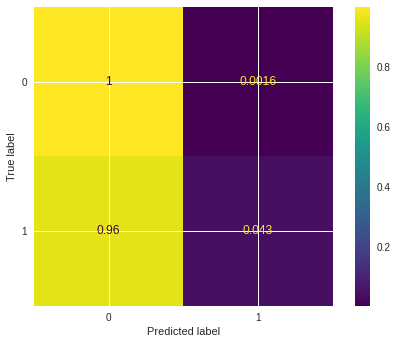

In [58]:
#evaluate train
print(classification_report(y_train, knn_tuned_train_predictions))
ConfusionMatrixDisplay.from_predictions(y_train, knn_tuned_train_predictions, normalize = 'true')

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



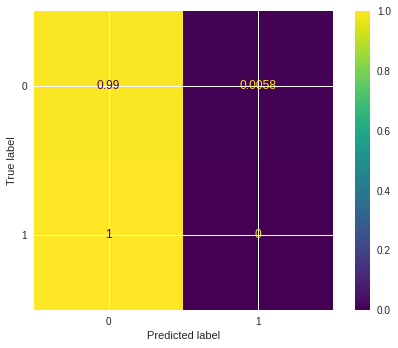

In [99]:
#evaluate test
print(classification_report(y_test, knn_tuned_test_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, knn_tuned_test_predictions, normalize = 'true')

##Logistic Regression Model reeval
Best Logistic Regression Parameters:

*   'logisticregression__max_iter': 1, 
*  'logisticregression__penalty': 'l1',

*  'logisticregression__solver': 'saga'
*  'pca__n_components': 1}


Accuracy of best Logistic Regression model is: 0.7081377151799687

In [113]:
#I only added a few parameters because oddly the hypertuned model got a worse score. 
log_reg_tuned = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg_tuned_pipe = make_pipeline(preprocessor,PCA(n_components= 11), log_reg_tuned)
log_reg_tuned_pipe.fit(X_train, y_train)
log_reg_tuned_train_predictions = log_reg_tuned_pipe.predict(X_train)
log_reg_tuned_test_predictions = log_reg_tuned_pipe.predict(X_test)
print('Predictions:')
log_reg_tuned_train_predictions
log_reg_tuned_test_predictions

Predictions:


array([0, 1, 0, ..., 0, 0, 0])

              precision    recall  f1-score   support

           0       0.99      0.73      0.84      3645
           1       0.14      0.83      0.24       187

    accuracy                           0.74      3832
   macro avg       0.56      0.78      0.54      3832
weighted avg       0.95      0.74      0.81      3832



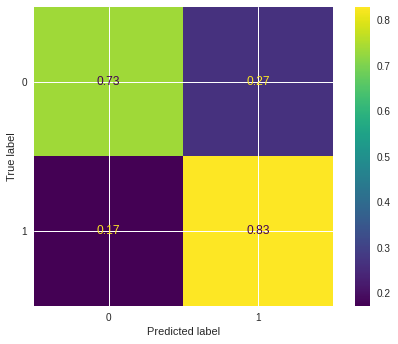

In [114]:
#evaluated train
print(classification_report(y_train, log_reg_tuned_train_predictions))
ConfusionMatrixDisplay.from_predictions(y_train, log_reg_tuned_train_predictions, normalize = 'true')

              precision    recall  f1-score   support

           0       0.99      0.74      0.84      1216
           1       0.14      0.81      0.23        62

    accuracy                           0.74      1278
   macro avg       0.56      0.77      0.54      1278
weighted avg       0.95      0.74      0.82      1278



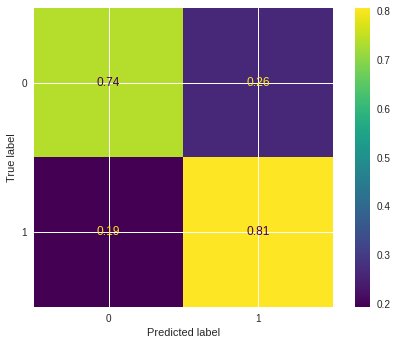

In [115]:
#evaluate test
print(classification_report(y_test, log_reg_tuned_test_predictions))
ConfusionMatrixDisplay.from_predictions(y_test, log_reg_tuned_test_predictions, normalize = 'true')

##Production model and final thoughts
The model i would chose for production would be Logistic regression. Medical data tends to come very unbalanced, and while the other models " performed better" they were highly biased favoring the majority class which were the healthy patients whos information was recorded. While a " high" accuracy is important the macro average, weighted average, and recall all were better on this model showing me it was better at analyzing what was needed to predict the occurance of stroke vs the other biased models. Also Logistic regression has better parameters to handle class imbalances so the model can keep on improving until we are in the high 90's on accuracy without bias. 